In [ ]:
# Import libraries
import os
import numpy as np
import pandas as pd
import tensorflow
import random
import cv2
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
import warnings
from keras import backend as K
from sklearn.model_selection import train_test_split
from PIL import Image
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization
from sklearn.metrics import confusion_matrix
from keras.models import Model
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.models import load_model

In [ ]:
def load_images_from_folder(folder):
	images = []
	dirs = os.listdir(folder)

	for filename in dirs:
		if os.path.isfile(folder+filename):
			im = Image.open(folder+filename)
			imResize = im.resize((224,224), Image.ANTIALIAS)
			imResize = np.array(imResize)
			if imResize is not None:
				images.append(imResize)
	return images


def prepareData(parentPath):

	# Make a list of all the 0 label and 1 label images for train, val, and test sets

	all0_path = list()


	all1_path = list()


	all0_path.append(parentPath+'/Abnormal(Ulcer)/')
	all1_path.append(parentPath+'/Normal(Healthy skin)/')


	# Read images into respective lists


	allX = list()
	allY = list()
	xTrain = list()
	yTrain = list()
	xVal = list()
	yVal = list()
	xTest = list()
	yTest = list()

	# Prepare all data for 0 class
	print('\n\n Class Abnormal(Ulcer), reading started..\n\n')


	tempImgs = list()
	tempImgs = load_images_from_folder(all0_path[0])
	for i in range(len(tempImgs)):
		allX.append(tempImgs[i])
		allY.append(0)

	# Prepare all data for 1 class
	print('\n\n Class Normal(Healthy skin), reading started..\n\n')
	tempImgs = list()
	tempImgs = load_images_from_folder(all1_path[0])
	for i in range(len(tempImgs)):
		allX.append(tempImgs[i])
		allY.append(1)

	xTrain,xTest,yTrain,yTest = train_test_split(allX,allY, test_size=0.20, random_state=10, shuffle = True)

	xpTrain,xVal,ypTrain,yVal = train_test_split(xTrain,yTrain, test_size=0.10, random_state=10, shuffle = True)

	return xpTrain, ypTrain, xVal, yVal, xTest, yTest

DenseNet

In [ ]:
from keras.applications.densenet import DenseNet121
def DenseNet121_transfer_actual(input_shape):
  res = DenseNet121(weights=None, include_top=False, input_shape=input_shape)
  for layers in res.layers:
    layers.trainable = True

  model = Sequential()
  model.add(res)

  model.add(Flatten())

  ## The following is the vanilla VGG16 architecture's FC layers
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=1000,activation="relu"))
  model.add(Dense(units=1, activation="sigmoid"))

  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  model.summary()
  return model

ResNet

In [ ]:
from keras.applications.resnet import ResNet50
def ResNet50_transfer_actual(input_shape):
  res = ResNet50(weights=None, include_top=False, input_shape=input_shape)
  for layers in res.layers:
    layers.trainable = True

  model = Sequential()
  model.add(res)

  model.add(Flatten())

  ## The following is the vanilla VGG16 architecture's FC layers
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=1000,activation="relu"))
  model.add(Dense(units=1, activation="sigmoid"))

  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  model.summary()
  return model

InceptionV3

In [ ]:
from keras.applications.inception_v3 import InceptionV3
def InceptionV3_transfer_actual(input_shape):
  res = InceptionV3(weights=None, include_top=False, input_shape=input_shape)
  for layers in res.layers:
    layers.trainable = True

  model = Sequential()
  model.add(res)

  model.add(Flatten())

  ## The following is the vanilla VGG16 architecture's FC layers
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=1000,activation="relu"))
  model.add(Dense(units=1, activation="sigmoid"))

  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  model.summary()
  return model

In [ ]:
import tensorflow as tf
from sklearn.metrics import roc_auc_score

def auroc(y_true, y_pred):
  return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

Importing dataset from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
parentPath='/content/drive/MyDrive/DFU/Patches'
xTrain, yTrain, xVal, yVal, xTest, yTest = prepareData(parentPath)

Mounted at /content/drive


 Class Abnormal(Ulcer), reading started..




 Class Normal(Healthy skin), reading started..




In [ ]:
xTrain = np.array(xTrain)
yTrain = np.array(yTrain)
xVal = np.array(xVal)
yVal = np.array(yVal)
xTest = np.array(xTest)
yTest = np.array(yTest)

# Prepare the data
img_width, img_height = 224, 224

if K.image_data_format() == 'channels_first':
  input_shape = (3, img_width, img_height)
else:
  input_shape = (img_width, img_height, 3)

# normalize inputs from 0-255 to 0-1
xTrain = xTrain / 255
xVal = xVal / 255
xTest = xTest / 255


Checking shape of Training, Validation and Test data

In [ ]:
print(xTrain.shape)
print(xVal.shape)
print(xTest.shape)

(759, 224, 224, 3)
(85, 224, 224, 3)
(211, 224, 224, 3)


In [ ]:
testPreds1 , testPreds2 , testPreds3 = 0 , 0 , 0

Training Model

In [ ]:
model1 = InceptionV3_transfer_actual(input_shape)
# model1 = ResNet50_transfer_actual(input_shape)
# model1 = DenseNet121_transfer_actual(input_shape)

  ## Train Model
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=200, restore_best_weights=True)
model1.fit(xTrain, yTrain, epochs=1000, batch_size=50, validation_data=(xVal, yVal), verbose=1, callbacks = [es])
#model2.fit(xTrain, yTrain, epochs=10, batch_size=50, validation_data=(xVal, yVal), verbose=1, callbacks = [es])
#model3.fit(xTrain, yTrain, epochs=10, batch_size=50, validation_data=(xVal, yVal), verbose=1, callbacks = [es])
testPreds1 = model1.predict(xTest)
print("Inception Done")

model1 = ResNet50_transfer_actual(input_shape)
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=200, restore_best_weights=True)
model1.fit(xTrain, yTrain, epochs=1000, batch_size=50, validation_data=(xVal, yVal), verbose=1, callbacks = [es])
testPreds2 = model1.predict(xTest)
print("resnet done")

model1 = DenseNet121_transfer_actual(input_shape)
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=200, restore_best_weights=True)
model1.fit(xTrain, yTrain, epochs=1000, batch_size=50, validation_data=(xVal, yVal), verbose=1, callbacks = [es])
testPreds3 = model1.predict(xTest)
print("densenet done.")

#model1.save('inception_v3.h5')
#model2.save('resnet_50.h5')
#model3.save('densenet121.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 4096)              209719296 
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dense_2 (Dense)             (None, 1000)              4097000   
                                                                 
 dense_3 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 252,401,393
Trainable params: 252,366,961


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/1000
16/16 [==============================] - 32s 857ms/step - loss: 0.5626 - accuracy: 0.6864 - val_loss: 0.6946 - val_accuracy: 0.5176
Epoch 2/1000
16/16 [==============================] - 6s 397ms/step - loss: 0.3908 - accuracy: 0.8419 - val_loss: 0.6970 - val_accuracy: 0.5176
Epoch 3/1000
16/16 [==============================] - 6s 400ms/step - loss: 0.2769 - accuracy: 0.8893 - val_loss: 0.7198 - val_accuracy: 0.5059
Epoch 4/1000
16/16 [==============================] - 7s 408ms/step - loss: 0.2172 - accuracy: 0.9262 - val_loss: 0.9536 - val_accuracy: 0.5176
Epoch 5/1000
16/16 [==============================] - 7s 413ms/step - loss: 0.1367 - accuracy: 0.9578 - val_loss: 1.2660 - val_accuracy: 0.5176
Epoch 6/1000
16/16 [==============================] - 6s 404ms/step - loss: 0.1703 - accuracy: 0.9368 - val_loss: 1.4276 - val_accuracy: 0.5176
Epoch 7/1000
16/16 [==============================] - 6s 405ms/step - loss: 0.1744 - accuracy: 0.9420 - val_loss: 1.6509 - val_accuracy

Calculation of Accuracy, Sensitivity, Specificity, Precision, Recall and AUC Value

In [ ]:
# print(testPreds1)
tp1 = []
for i in testPreds1:
  if i < 0.5:
    tp1.append(0)
  else:
    tp1.append(1)
# print(testPreds)
tp2 = []
for i in testPreds2:
  if i < 0.5:
    tp2.append(0)
  else:
    tp2.append(1)

# print(testPreds1)
tp3 = []
for i in testPreds3:
  if i < 0.5:
    tp3.append(0)
  else:
    tp3.append(1)

cm = confusion_matrix(yTest, tp1)
sensitivity1 = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity1 = cm[1, 1] / (cm[1, 0] + cm[1, 1])
precision1 = cm[0, 0] / (cm[0, 0] + cm[1, 0])
recall1 = cm[1, 1] / (cm[0, 1] + cm[1, 1])
accuracy1 = (cm[0,0] + cm[1,1]) / (cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
print("For inceptionv3")
print("\n Accuracy: ",accuracy1)
print()
print("\n Sensitivity: ",sensitivity1)
print()
print("\n Specificity: ",specificity1)
print()
print("\n Precision: ",precision1)
print()
print("\n Recall: ",recall1)
print()
print("AUC Value: ", roc_auc_score(yTest, tp1))




cm = confusion_matrix(yTest, tp2)
sensitivity2 = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity2 = cm[1, 1] / (cm[1, 0] + cm[1, 1])
precision2 = cm[0, 0] / (cm[0, 0] + cm[1, 0])
recall2 = cm[1, 1] / (cm[0, 1] + cm[1, 1])
accuracy2 = (cm[0,0] + cm[1,1]) / (cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
print("\n\nFor Resnet")
print("\n Accuracy: ",accuracy2)
print()
print("\n Sensitivity: ",sensitivity2)
print()
print("\n Specificity: ",specificity2)
print()
print("\n Precision: ",precision2)
print()
print("\n Recall: ",recall2)
print()
print("AUC Value: ", roc_auc_score(yTest, tp2))




cm = confusion_matrix(yTest, tp3)
sensitivity3 = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity3 = cm[1, 1] / (cm[1, 0] + cm[1, 1])
precision3 = cm[0, 0] / (cm[0, 0] + cm[1, 0])
recall3 = cm[1, 1] / (cm[0, 1] + cm[1, 1])
accuracy3 = (cm[0,0] + cm[1,1]) / (cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
print("\n\nFor DenseNet")
print("\n Accuracy: ",accuracy3)
print()
print("\n Sensitivity: ",sensitivity3)
print()
print("\n Specificity: ",specificity3)
print()
print("\n Precision: ",precision3)
print()
print("\n Recall: ",recall3)
print()
print("AUC Value: ", roc_auc_score(yTest, tp3))


For inceptionv3

 Accuracy:  0.9620853080568721


 Sensitivity:  0.925531914893617


 Specificity:  0.9914529914529915


 Precision:  0.9886363636363636


 Recall:  0.943089430894309

AUC Value:  0.9584924531733042


For Resnet

 Accuracy:  0.957345971563981


 Sensitivity:  0.9680851063829787


 Specificity:  0.9487179487179487


 Precision:  0.9381443298969072


 Recall:  0.9736842105263158

AUC Value:  0.9584015275504637


For DenseNet

 Accuracy:  0.933649289099526


 Sensitivity:  0.9361702127659575


 Specificity:  0.9316239316239316


 Precision:  0.9166666666666666


 Recall:  0.9478260869565217

AUC Value:  0.9338970721949446


Confusion Matrix for InceptionV3

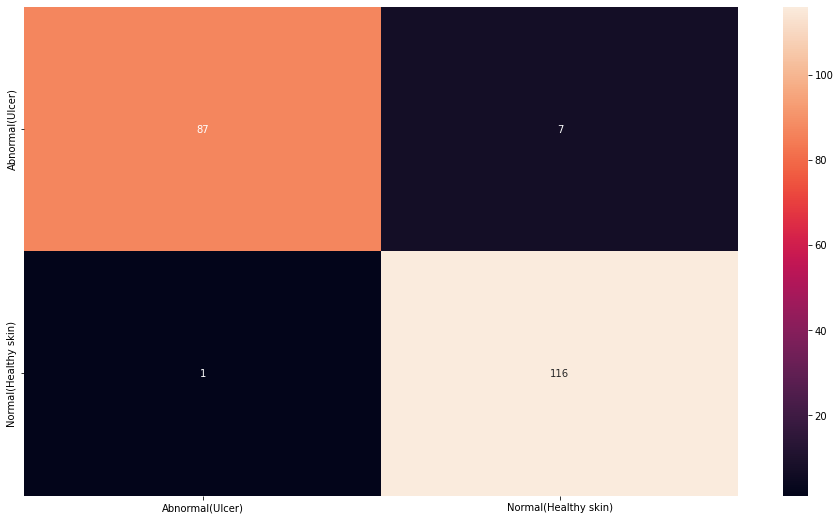

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
class_labels = ["Abnormal(Ulcer)","Normal(Healthy skin)"]
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in testPreds1]
# cm = confusion_matrix(yTest, y_pred_labels)
cm = confusion_matrix(yTest, tp1)
sns.heatmap(cm, annot = True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)

Confusion Matrix for ResNet

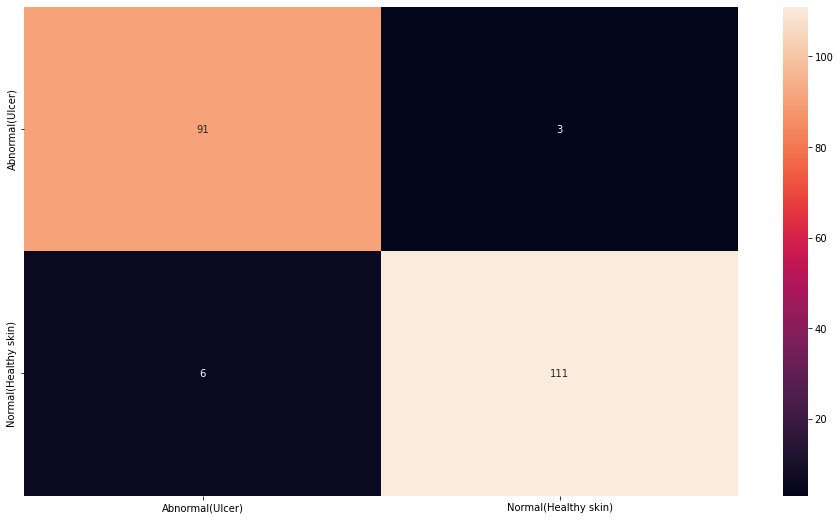

In [ ]:
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in testPreds2]
cm = confusion_matrix(yTest, tp2)
sns.heatmap(cm, annot = True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)

Confusion Matrix for DenseNet

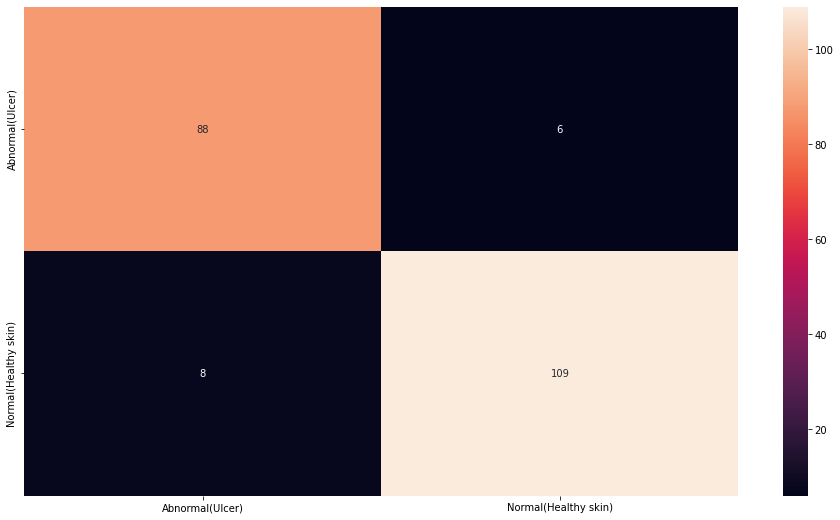

In [ ]:
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in testPreds3]
cm = confusion_matrix(yTest, tp3)
sns.heatmap(cm, annot = True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)

In [ ]:
# import warnings
# warnings.filterwarnings('always')
# from sklearn.metrics import classification_report
# y_pred_labels = [np.argmax(tp1) for tp1 in testPreds1]
# cr= classification_report(yTest, y_pred_labels, target_names=class_labels)
# print(cr)
# print(yTest)
# print(y_pred_labels)
# print(class_labels)
# print(testPreds1)
# print(label)

Calculate F1 Score

In [ ]:
from sklearn.metrics import f1_score
f1_score1 = 2 * (precision1 * recall1) / (precision1 + recall1)
# f1 = f1_score(yTest, testPreds1)
print(f1_score1)

f1_score2 = 2 * (precision2 * recall2) / (precision2 + recall2)
# f1 = f1_score(yTest, testPreds1)
print(f1_score2)

f1_score3 = 2 * (precision3 * recall3) / (precision3 + recall3)
# f1 = f1_score(yTest, testPreds1)
print(f1_score3)


0.9653259361997226
0.9555839364268484
0.9319860085503303


Classification Report

In [ ]:
from tabulate import tabulate
table = [['Model Name','Accuracy','Sensitivity','Specificity', 'Precision', 'Recall','F1 Score', 'AUC Value'],

         ['inceptionv3', accuracy1, sensitivity1, specificity1, precision1, recall1,f1_score1, roc_auc_score(yTest, tp1)],
         ['Resnet', accuracy2, sensitivity2, specificity2, precision2, recall2,f1_score2, roc_auc_score(yTest, tp2)],
         ['DenseNet',accuracy3, sensitivity3, specificity3, precision3, recall3,f1_score3, roc_auc_score(yTest, tp3)]]

print(tabulate(table, headers='firstrow', tablefmt='grid'))

+--------------+------------+---------------+---------------+-------------+----------+------------+-------------+
| Model Name   |   Accuracy |   Sensitivity |   Specificity |   Precision |   Recall |   F1 Score |   AUC Value |
+==============+============+===============+===============+=============+==========+============+=============+
| inceptionv3  |   0.962085 |      0.925532 |      0.991453 |    0.988636 | 0.943089 |   0.965326 |    0.958492 |
+--------------+------------+---------------+---------------+-------------+----------+------------+-------------+
| Resnet       |   0.957346 |      0.968085 |      0.948718 |    0.938144 | 0.973684 |   0.955584 |    0.958402 |
+--------------+------------+---------------+---------------+-------------+----------+------------+-------------+
| DenseNet     |   0.933649 |      0.93617  |      0.931624 |    0.916667 | 0.947826 |   0.931986 |    0.933897 |
+--------------+------------+---------------+---------------+-------------+----------+--